https://docs.julialang.org/en/stable/

https://github.com/jmxpearson/julia-for-pythonistas

https://www.juliabox.com/

In [1]:
# Example 1.2 from Shumway
using Gadfly
using DataFrames
using RData

# This RDA file is just a list with name 'gtemp', returned as a dict with one key
data_gtemp = RData.load("data/gtemp.rda")["gtemp"]
df_gtemp = DataFrame(Time=1880:2009, TemperatureDeviation=data_gtemp)
function mysquare(x)
    return x^2
end

mysquare (generic function with 1 method)

In [2]:
describe(df_gtemp)

Time
Min      1880.0
1st Qu.  1912.25
Median   1944.5
Mean     1944.5
3rd Qu.  1976.75
Max      2009.0
NAs      0
NA%      0.0%

TemperatureDeviation
Min      -0.39
1st Qu.  -0.2175
Median   -0.05
Mean     -0.021615384615384613
3rd Qu.  0.0975
Max      0.62
NAs      0
NA%      0.0%



In [3]:
df_gtemp[:Time]

130-element DataArrays.DataArray{Int64,1}:
 1880
 1881
 1882
 1883
 1884
 1885
 1886
 1887
 1888
 1889
 1890
 1891
 1892
    ⋮
 1998
 1999
 2000
 2001
 2002
 2003
 2004
 2005
 2006
 2007
 2008
 2009

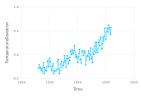

In [4]:
plot(df_gtemp, x="Time", y="TemperatureDeviation", Geom.point, Geom.line)

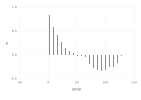

In [5]:
using StatsBase

# NOTE: The columns in DataFrame are DataArray, which must be converted back to
# normal Julia Array before passing to libraries that aren't DataFrame aware. Limits
# usefulness of DataFrames...
data_time = convert(Array, df_gtemp[:Time])
lags = 0:length(data_time)-1
acf = autocor(data_gtemp, lags)
plot(y=acf, xmin=lags-0.1, xmax=lags+0.1, Geom.bar)

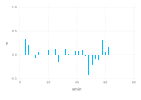

In [6]:
lags = 1:div(length(data_gtemp),2)-1
pacf_gtemp = pacf(data_gtemp, lags)
plot(y=pacf_gtemp, xmin=lags-0.1, xmax=lags+0.1, Geom.bar)

In [7]:
using MultivariateStats

# Setup up simple linear model for temperature data - assume temp = beta_1 + beta_2 t
X = ones(length(data_time), 2)
X[:,2] = data_time
X

130×2 Array{Float64,2}:
 1.0  1880.0
 1.0  1881.0
 1.0  1882.0
 1.0  1883.0
 1.0  1884.0
 1.0  1885.0
 1.0  1886.0
 1.0  1887.0
 1.0  1888.0
 1.0  1889.0
 1.0  1890.0
 1.0  1891.0
 1.0  1892.0
 ⋮          
 1.0  1998.0
 1.0  1999.0
 1.0  2000.0
 1.0  2001.0
 1.0  2002.0
 1.0  2003.0
 1.0  2004.0
 1.0  2005.0
 1.0  2006.0
 1.0  2007.0
 1.0  2008.0
 1.0  2009.0

In [8]:
beta = llsq(X, data_gtemp, bias=false)

2-element Array{Float64,1}:
 -11.1995    
   0.00574846

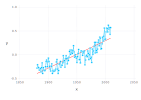

In [9]:
lsq_gtemp = beta[1]+beta[2]*data_time
plot(layer(x=data_time, y=data_gtemp, Geom.point, Geom.line),
     layer(x=data_time, y=lsq_gtemp, Geom.line,
           Theme(default_color=colorant"red")))

In [10]:
SSE = sum((data_gtemp-lsq_gtemp).^2)

2.0047673664804937

In [11]:
function scatterMatrix(df::AbstractDataFrame, cols::Vector{String})
    ncols = length(cols)
    plots = Array{Gadfly.Plot}(ncols, ncols)
    xlabel = nothing
    ylabel = nothing
    for i = 1:ncols
        for j = 1:ncols
            if i == ncols
                xlabel = cols[i]
            else
                xlable = nothing
            end
            if j == 1
                ylabel = cols[j]
            else
                ylabel = nothing
            end
            plots[i,j] = plot(df, x=cols[i], y=cols[j],
                              Guide.xlabel(xlabel), Guide.ylabel(ylabel))
        end
    end
    gridstack(plots)
end

scatterMatrix (generic function with 1 method)

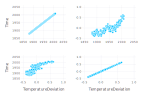

In [12]:
scatterMatrix(df_gtemp, ["Time", "TemperatureDeviation"])

In [13]:
# Load datasets for Shumway Example 2.2
data_cmort = RData.load("data/cmort.rda")["cmort"]
data_tempr = RData.load("data/tempr.rda")["tempr"]
data_part  = RData.load("data/part.rda")["part"]
data_tempr_deviations = data_tempr - mean(data_tempr)
data_tempr_dsquared = data_tempr_deviations.^2
data_time = 1:length(data_cmort)
df_cmort = DataFrame(time=data_time, cmort=data_cmort, tempr=data_tempr,
                     tempr_deviations=data_tempr_deviations,
                     tempr_dsquared=data_tempr_dsquared,
                     part=data_part)

,time,cmort,tempr,tempr_deviations,tempr_dsquared,part
1,1,97.85,72.38,-1.8804133858267562,3.535954501596445,72.72
2,2,104.64,67.19,-7.070413385826754,49.990745446478144,49.6
3,3,94.36,62.94,-11.320413385826754,128.15175922600554,55.68
4,4,98.05,72.49,-1.7704133858267568,3.1343635567145607,55.16
5,5,95.85,74.25,-0.010413385826751664,0.00010843860437679245,66.02
6,6,95.98,67.88,-6.380413385826756,40.70967497403725,44.01
7,7,88.63,74.2,-0.06041338582674882,0.0036497771870516154,47.83
8,8,90.85,74.88,0.6195866141732438,0.3838875724626641,43.6
9,9,92.06,64.17,-10.09041338582675,101.81644229687166,24.99
10,10,88.75,67.09,-7.170413385826748,51.41482812364341,40.41


In [14]:
Z5 = ones(length(data_cmort), 5)
Z5[:,2] = data_time
Z5[:,3] = data_tempr_deviations
Z5[:,4] = data_tempr_dsquared
Z5[:,5] = data_part
beta5 = llsq(Z5, data_cmort, bias=false)
lsq5_cmort = Z5 * beta5
SSE5 = sum((data_cmort-lsq5_cmort).^2)

20508.44022061056

In [15]:
Z2 = ones(length(data_cmort), 2)
Z2[:,2] = data_time
beta2 = llsq(Z2, data_cmort, bias=false)
lsq2_cmort = Z2 * beta2
SSE2 = sum((data_cmort-lsq2_cmort).^2)

40019.83714264338

In [16]:
# compare with Shumway p55
q = 5
r = 2
n = length(data_cmort)
F = ((SSE2 - SSE5)/(q-r))/(SSE5/(n-q))

159.51534337749405

In [17]:
using Distributions

fd = FDist(q-r, n-q)
Fcrit = quantile(fd, 1-0.001) # find value of s.t. P(F>Fcrit) = 0.001

5.505160543118326

In [18]:
# NOTE: I'm pretty sure Shumway TSA3 BIC values in Table 2.2 are wrong p55
aic(sse,n,k) = log(sse/n) + (n+2k)/n
aicc(sse,n,k) = log(sse/n) + (n+k)/(n-k-2)
bic(sse,n,k) = log(sse/n) + k*log(n)/n
aic(SSE5,n,5), aicc(SSE5,n,5), bic(SSE5,n,5)

(4.717795390264029,4.722062446702333,3.759433987189014)

In [19]:
aic(SSE2,n,2), aicc(SSE2,n,2), bic(SSE2,n,2)

(5.374523106899778,5.378553853056508,4.391178545669772)

In [20]:
scatterMatrix(df_cmort, ["time", "cmort", "tempr", "tempr_deviations", "tempr_dsquared", "part"])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [21]:
Z4 = Z5[:,1:4]
beta4 = llsq(Z4, data_cmort, bias=false)
lsq4_cmort = Z4 * beta4
SSE4 = sum((data_cmort-lsq4_cmort).^2)

27984.526948537427

In [22]:
Z3 = Z5[:,1:3]
beta3 = llsq(Z3, data_cmort, bias=false)
lsq3_cmort = Z3 * beta3
SSE3 = sum((data_cmort-lsq3_cmort).^2)

31413.21081809722

In [23]:
aic(SSE3,n,3), aicc(SSE3,n,3), bic(SSE3,n,3)

(5.136313386150246,5.140406935092812,4.161296544305237)

In [24]:
aic(SSE4,n,4), aicc(SSE4,n,4), bic(SSE4,n,4)

(5.024673611349498,5.028845898578535,4.0579844888894865)

In [25]:
Fstat(sse_r, sse, n, q, r) = ((sse_r - sse)/(q-r))/(sse/(n-q)), quantile(FDist(q-r, n-q), 1-0.001)

Fstat (generic function with 1 method)

In [26]:
Fstat(SSE4, SSE5, n, 5, 4)

(183.36214669158593,10.955926823712305)

In [27]:
Fstat(SSE3, SSE4, n, 4, 3)

(61.75043349619497,10.955670026024473)

In [28]:
Fstat(SSE2, SSE3, n, 3, 2)

(138.3604598416877,10.955414253765777)

In [29]:
sses = [nothing, SSE2, SSE3, SSE4, SSE5]

5-element Array{Any,1}:
      nothing
 40019.8     
 31413.2     
 27984.5     
 20508.4     

In [33]:
println("SSE  AIC  AICc  BIC")
for i = 2:5
    println(sses[i], " ", aic(sses[i],n,i), " ", aicc(sses[i],n,i), " ", bic(sses[i],n,i))
    if i < 5
        println(" F: ", Fstat(sses[i], sses[i+1], n, i+1, i))
    end
end

SSE  AIC  AICc  BIC
40019.83714264338 5.374523106899778 5.378553853056508 4.391178545669772
 F: (138.3604598416877,10.955414253765777)
31413.21081809722 5.136313386150246 5.140406935092812 4.161296544305237
 F: (61.75043349619497,10.955670026024473)
27984.526948537427 5.024673611349498 5.028845898578535 4.0579844888894865
 F: (183.36214669158593,10.955926823712305)
20508.44022061056 4.717795390264029 4.722062446702333 3.759433987189014
